In [5]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder

# to play the audio files
from IPython.display import Audio

# sklearn
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [135]:
Crema = "./Crema/AudioWAV/"

In [136]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
# Split the data into training and testing sets
train_df, test_df = train_test_split(Crema_df, test_size=0.3, random_state=42, stratify=Crema_df['Emotions'])

# Display the first few rows of the training and testing dataframes
print("Training Set:")
print(train_df.head())

print("\nTesting Set:")
print(test_df.head())

Training Set:
     Emotions                                  Path
3323  neutral  ./Crema/AudioWAV/1041_TAI_NEU_XX.wav
3083  neutral  ./Crema/AudioWAV/1038_TIE_NEU_XX.wav
2612    angry  ./Crema/AudioWAV/1033_IEO_ANG_LO.wav
1232    happy  ./Crema/AudioWAV/1016_IEO_HAP_HI.wav
4448      sad  ./Crema/AudioWAV/1055_ITS_SAD_XX.wav

Testing Set:
     Emotions                                  Path
3609      sad  ./Crema/AudioWAV/1045_IEO_SAD_LO.wav
2706      sad  ./Crema/AudioWAV/1034_IEO_SAD_HI.wav
2019    angry  ./Crema/AudioWAV/1025_TSI_ANG_XX.wav
1241     fear  ./Crema/AudioWAV/1016_IOM_FEA_XX.wav
3749     fear  ./Crema/AudioWAV/1046_WSI_FEA_XX.wav


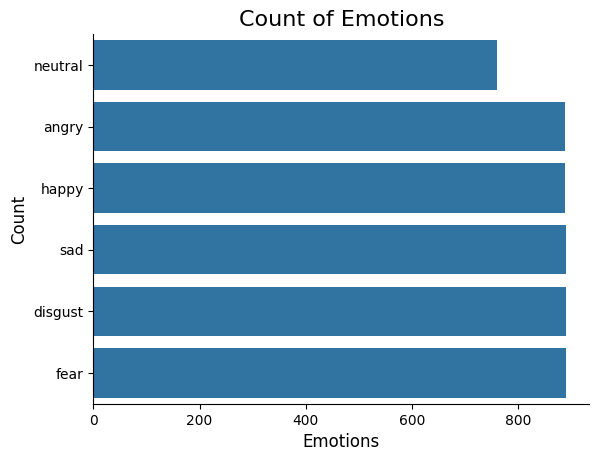

In [137]:
plt.title('Count of Emotions', size=16)
sns.countplot(train_df.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

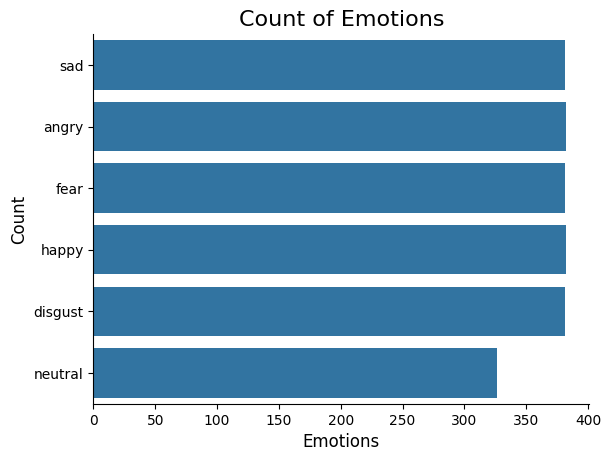

In [138]:
plt.title('Count of Emotions', size=16)
sns.countplot(test_df.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [139]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

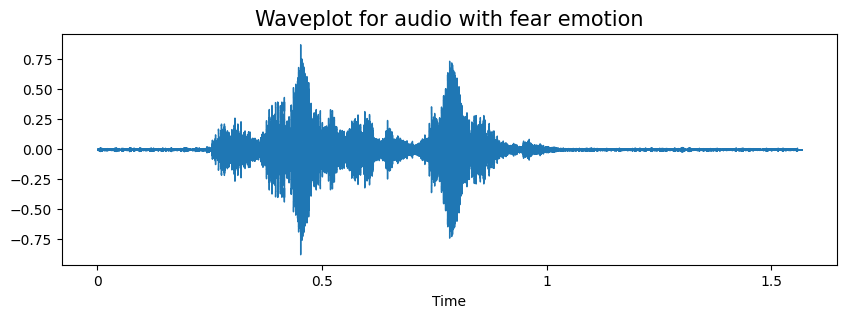

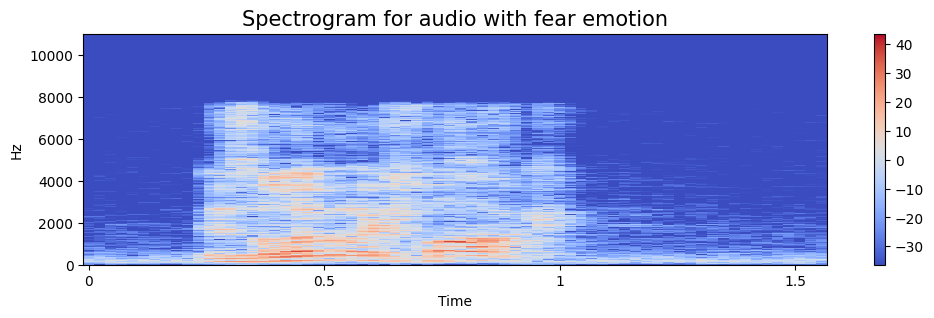

In [140]:
emotion='fear'
path = np.array(Crema_df.Path[Crema_df.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

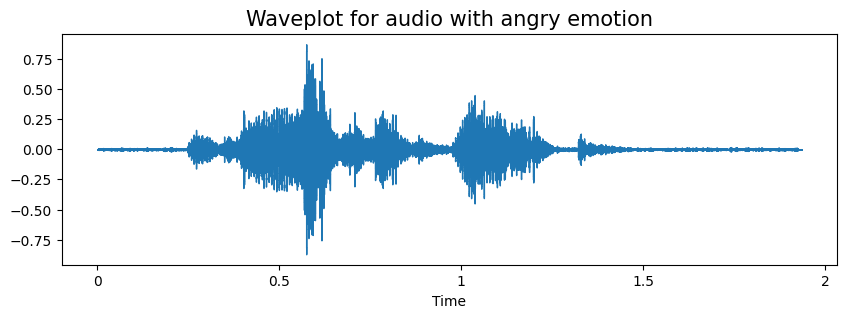

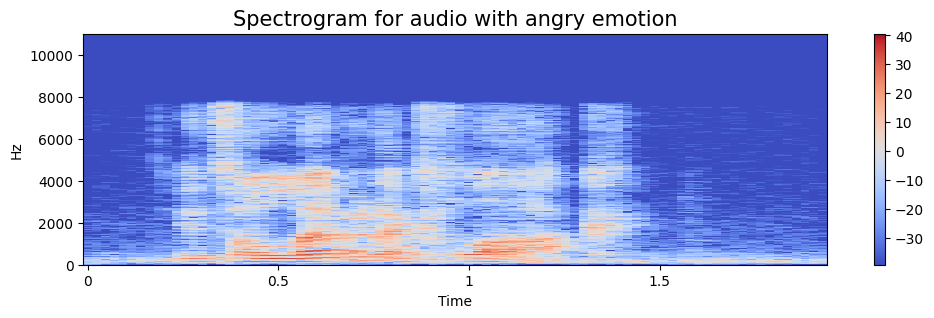

In [141]:
emotion='angry'
path = np.array(Crema_df.Path[Crema_df.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

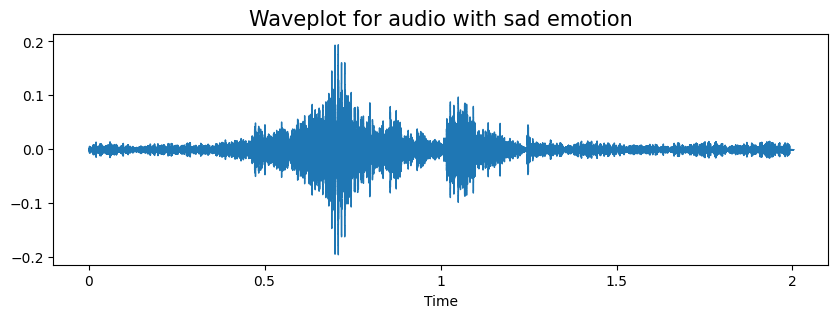

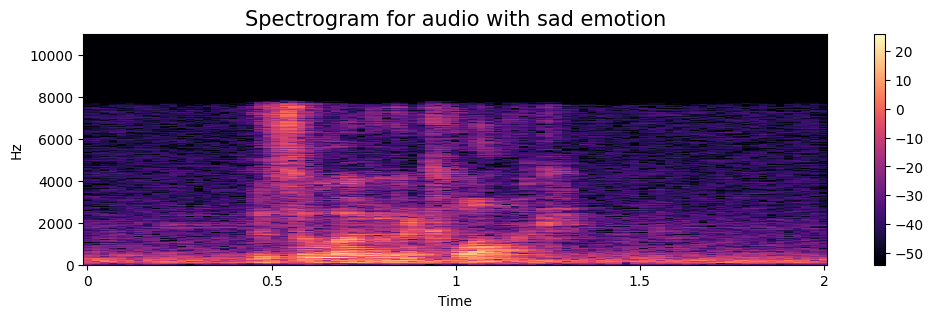

In [142]:
emotion='sad'
path = np.array(Crema_df.Path[Crema_df.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

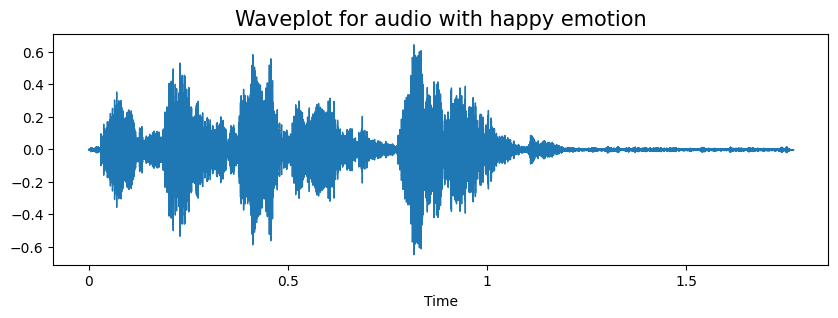

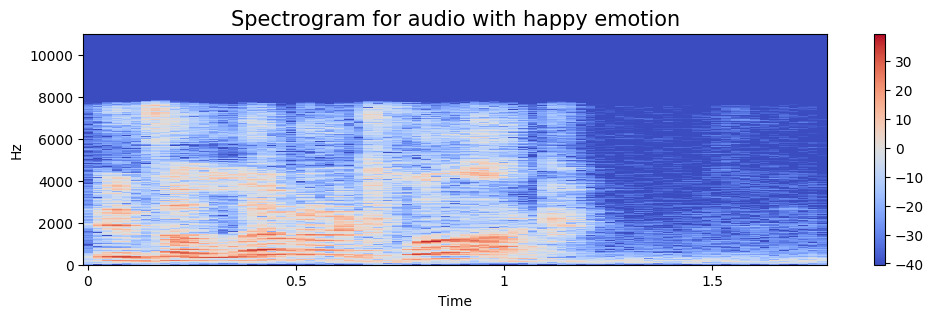

In [143]:
emotion='happy'
path = np.array(Crema_df.Path[Crema_df.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

In [144]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data):
    return librosa.effects.time_stretch(data, rate=0.8)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=pitch_factor)

# taking any example and checking for techniques.
path = np.array(Crema_df.Path)[1]
data, sample_rate = librosa.load(path)

In [146]:
print(sample_rate)

22050


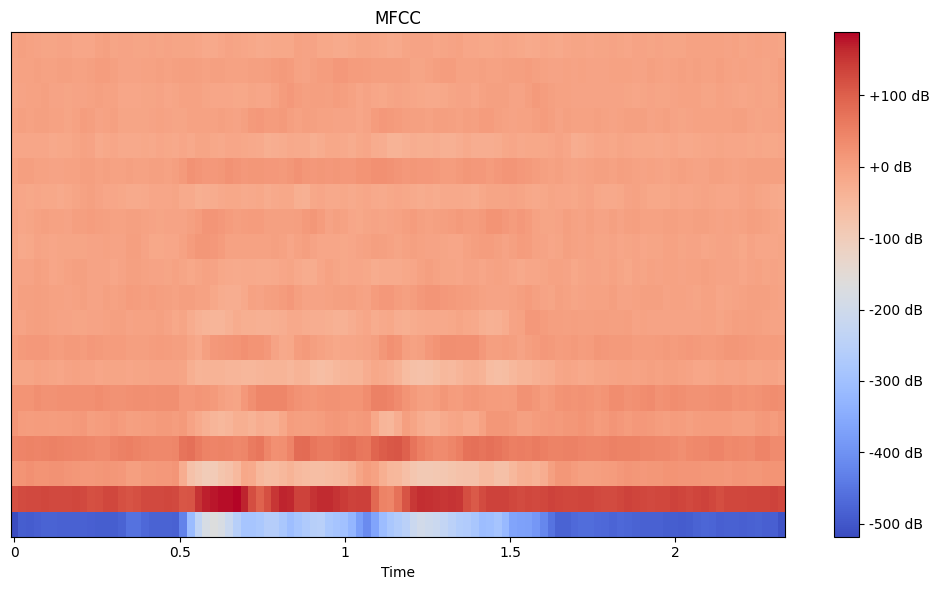

In [145]:
path = np.array(Crema_df.Path)[1]
data, sample_rate = librosa.load(path, duration=2.5)
mfcc = librosa.feature.mfcc(y=data, sr=sample_rate)
# Plot the MFCCs
plt.figure(figsize=(10, 6))
librosa.display.specshow(mfcc, sr=sample_rate, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC')
plt.tight_layout()
plt.show()

In [147]:
print(mfcc.shape)

(20, 101)


In [48]:
def extract_features(data):
    result = np.array([])
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally
    return result

def get_features_train(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5)
    
    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically
    
    return result

def get_features_test(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5)
    
    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    return result

In [49]:
X_train, y_train = [], []
for path, emotion in zip(train_df.Path, train_df.Emotions):
    feature = get_features_train(path)
    for ele in feature:
        X_train.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        y_train.append(emotion)

In [2]:
trainFeatures = pd.DataFrame(X_train)
trainFeatures['labels'] = y_train
trainFeatures.to_csv('train_features.csv', index=False)
trainFeatures.head()

NameError: name 'pd' is not defined

In [57]:
X_test, y_test = [], []
for path, emotion in zip(test_df.Path, test_df.Emotions):
    feature = get_features_test(path)
    X_test.append(feature)
    y_test.append(emotion)

In [3]:
testFeatures = pd.DataFrame(X_test)
testFeatures['labels'] = y_test
testFeatures.to_csv('test_features.csv', index=False)
testFeatures.head()

NameError: name 'pd' is not defined

In [6]:
trainFeatures = pd.read_csv('train_features.csv')
trainFeatures.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,labels
0,-224.968018,88.127022,-28.556711,42.041729,-26.456383,2.425796,-11.314594,6.590621,-17.847683,5.558612,...,-4.974501,-0.567333,-18.406267,0.743784,-14.731791,3.375727,-1.110938,6.291061,1.466656,angry
1,-136.773198,31.956022,-6.451932,9.706217,-8.906907,-9.483890,-1.076323,-2.119147,-8.502661,-0.313184,...,-3.612076,-4.814447,-10.381835,-4.142573,-6.554126,-0.717115,2.655032,2.748287,2.174956,angry
2,-248.623230,81.649124,-30.429928,40.234570,-31.664913,1.797544,-10.668080,5.378362,-18.987909,9.986733,...,-2.077498,-8.139628,-17.467079,-1.917704,-13.126306,7.943971,-0.954535,8.997632,-3.221879,angry
3,-100.947824,12.799493,-4.975743,3.333458,-6.885051,-8.063052,1.238954,-2.811634,-4.860511,-0.631905,...,-3.053434,-5.006016,-7.159232,-4.560851,-3.334749,0.883521,3.125114,2.915285,0.983916,angry
4,-512.800476,67.036659,16.652534,14.732719,1.504934,3.908049,-0.935905,-0.582631,-9.197448,-4.361269,...,-5.011508,-0.741592,-3.763394,-0.052377,-0.403557,-4.546918,-2.480759,-2.854675,-2.769855,angry


In [7]:
testFeatures = pd.read_table("test_features.csv", delimiter =",") 
testFeatures.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,labels
0,-409.781708,138.898575,16.619120,62.106537,-17.951117,20.537199,-10.197814,7.864418,-18.024940,0.866107,...,-5.015299,2.547534,-9.577332,6.215036,-11.494952,5.029482,-9.257662,-0.076080,-3.420002,disgust
1,-233.677643,8.696068,-31.825783,24.878464,-12.394256,9.717953,2.869047,-1.489102,-5.796555,5.779031,...,-2.419949,3.457555,3.048745,-2.770976,2.774320,7.404535,20.457363,4.896526,10.671601,fear
2,-410.981934,151.671387,5.876148,43.884144,-23.448103,24.610785,-14.701571,8.819416,-12.981906,1.977745,...,-1.154785,0.508979,-7.687923,4.037377,-12.825150,3.821622,-6.810735,5.192341,-3.801493,happy
3,-574.189026,69.399467,-16.230627,24.212524,3.046218,-8.011155,-1.873429,-11.898146,-2.485888,-3.896015,...,-7.381905,-3.164908,-1.465565,-2.655161,-5.886915,-5.339420,0.675956,-3.710739,0.588331,happy
4,-356.280884,68.444229,0.273231,-4.796208,-29.325169,7.266706,-1.323918,-15.098816,-5.528758,-3.504280,...,7.690853,-16.099146,6.859893,-0.259191,-7.920983,-2.280723,-2.810234,-8.536092,-2.973209,angry


In [8]:
train = trainFeatures[trainFeatures['labels'].isin(["angry", "happy", "sad"])]
train.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,labels
0,-224.968018,88.127022,-28.556711,42.041729,-26.456383,2.425796,-11.314594,6.590621,-17.847683,5.558612,...,-4.974501,-0.567333,-18.406267,0.743784,-14.731791,3.375727,-1.110938,6.291061,1.466656,angry
1,-136.773198,31.956022,-6.451932,9.706217,-8.906907,-9.483890,-1.076323,-2.119147,-8.502661,-0.313184,...,-3.612076,-4.814447,-10.381835,-4.142573,-6.554126,-0.717115,2.655032,2.748287,2.174956,angry
2,-248.623230,81.649124,-30.429928,40.234570,-31.664913,1.797544,-10.668080,5.378362,-18.987909,9.986733,...,-2.077498,-8.139628,-17.467079,-1.917704,-13.126306,7.943971,-0.954535,8.997632,-3.221879,angry
3,-100.947824,12.799493,-4.975743,3.333458,-6.885051,-8.063052,1.238954,-2.811634,-4.860511,-0.631905,...,-3.053434,-5.006016,-7.159232,-4.560851,-3.334749,0.883521,3.125114,2.915285,0.983916,angry
4,-512.800476,67.036659,16.652534,14.732719,1.504934,3.908049,-0.935905,-0.582631,-9.197448,-4.361269,...,-5.011508,-0.741592,-3.763394,-0.052377,-0.403557,-4.546918,-2.480759,-2.854675,-2.769855,angry


In [9]:
test = testFeatures[testFeatures['labels'].isin(["angry", "happy", "sad"])]
test.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,labels
2,-410.981934,151.671387,5.876148,43.884144,-23.448103,24.610785,-14.701571,8.819416,-12.981906,1.977745,...,-1.154785,0.508979,-7.687923,4.037377,-12.825150,3.821622,-6.810735,5.192341,-3.801493,happy
3,-574.189026,69.399467,-16.230627,24.212524,3.046218,-8.011155,-1.873429,-11.898146,-2.485888,-3.896015,...,-7.381905,-3.164908,-1.465565,-2.655161,-5.886915,-5.339420,0.675956,-3.710739,0.588331,happy
4,-356.280884,68.444229,0.273231,-4.796208,-29.325169,7.266706,-1.323918,-15.098816,-5.528758,-3.504280,...,7.690853,-16.099146,6.859893,-0.259191,-7.920983,-2.280723,-2.810234,-8.536092,-2.973209,angry
5,-344.991364,56.161900,-21.221060,6.660259,-22.434557,9.121241,-3.040804,-17.465864,-3.080345,-4.023541,...,9.122016,-13.268463,9.707204,-0.865990,-7.356742,-0.598327,-1.055634,-4.640522,1.432572,angry
6,-378.017456,117.926369,27.451477,20.898643,-10.328207,17.941603,4.995150,-12.723850,5.309674,-3.542826,...,-4.011790,-11.872843,6.765612,-6.979980,-0.724146,-2.890197,-4.367773,-3.368738,-10.506060,sad


In [10]:
X_train = train.iloc[: ,:-1].values
y_train = train['labels'].values
X_test = test.iloc[: ,:-1].values
y_test = test['labels'].values

In [11]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((16152, 20), (16152,), (1731, 20), (1731,))

In [12]:
model = SVC() 
model.fit(X_train, y_train) 
  
# print prediction results 
predictions = model.predict(X_test) 
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

       angry       0.80      0.77      0.79       577
       happy       0.73      0.72      0.72       577
         sad       0.85      0.89      0.87       577

    accuracy                           0.79      1731
   macro avg       0.79      0.79      0.79      1731
weighted avg       0.79      0.79      0.79      1731



In [104]:
from sklearn.model_selection import KFold, cross_val_score

k = KFold(n_splits = 5, shuffle=True, random_state=42)  # Number of folds

param = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}
  
grid = GridSearchCV(estimator=SVC(), param_grid=param, refit = True, verbose = 3, cv=k, scoring='accuracy') 
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.465 total time=   6.8s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.478 total time=   6.6s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.463 total time=   6.9s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.459 total time=   6.5s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.446 total time=   6.6s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.766 total time=   3.9s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.758 total time=   4.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.755 total time=   4.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.767 total time=   4.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.766 total time=   3.9s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.726 total time=   4.5s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=3)

In [119]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=10, gamma=0.1)


In [28]:
best_model = SVC(C=10, gamma=0.1, kernel='rbf')
best_model.fit(X_train, y_train)

SVC(C=10, gamma=0.1)

In [14]:
from sklearn.model_selection import KFold, cross_val_score

# Create a KFold object
k = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(best_model, X_train, y_train, cv=k, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())
print("Standard deviation of cross-validation scores: ", cv_scores.std())

Cross-validation scores: [0.84339214 0.84524915 0.8380805  0.84427245 0.83003096]
Mean CV accuracy: 0.8402050376911749
Standard deviation of cross-validation scores:  0.005659859027962081


In [29]:
predictions = best_model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       angry       0.78      0.80      0.79       577
       happy       0.75      0.72      0.73       577
         sad       0.87      0.89      0.88       577

    accuracy                           0.80      1731
   macro avg       0.80      0.80      0.80      1731
weighted avg       0.80      0.80      0.80      1731



In [21]:
print("Train accuracy: {:.2f}%".format(best_model.score(X_train, y_train)*100))
print("Test Accuracy: {:.2f}%".format(accuracy_score(y_test, predictions)*100))


Train accuracy: 93.98%
Test Accuracy: 80.30%


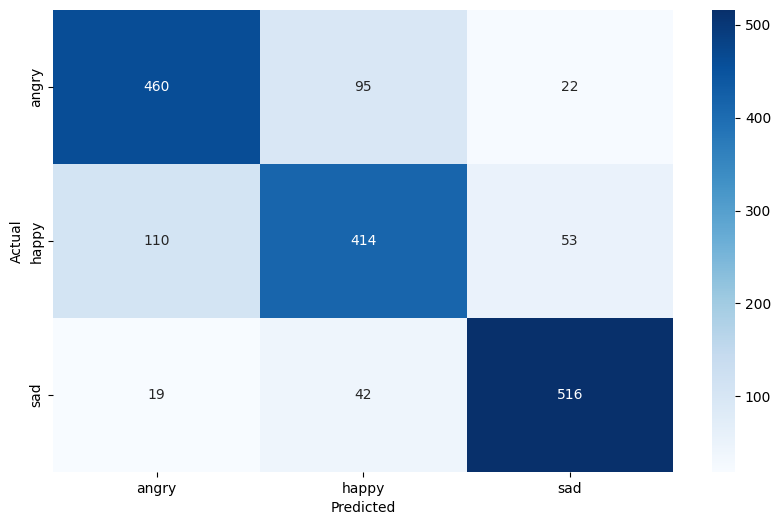

In [22]:
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['angry', 'happy', 'sad'], yticklabels=['angry', 'happy', 'sad'], cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [35]:
import pickle
# Save the model as a pickle in a file
with open('SVM.pkl', 'wb') as f:
    pickle.dump(model, f)

In [36]:
import joblib
filename = 'SVM.sav'
joblib.dump(model, filename)

['SVM.sav']

In [34]:
print(predictions)

['happy' 'happy' 'angry' ... 'sad' 'sad' 'happy']
